# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000) #TODO change this back at some point bc the size is so small. 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1408

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [32]:
#wrap this in a try and accept to grab stuff

url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
humidity = []
clouds = []
wind_speed = []


for city in cities: 
    try: 
        city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
 
        json_responce = requests.get(city_url).json()
        temp.append(1.8 * (float(json_responce["main"]["temp"])-273) + 32)
        humidity.append(json_responce["main"]["humidity"])
        clouds.append(json_responce["clouds"]["all"])
        wind_speed.append(json_responce["wind"]["speed"])

        #in here we are grabbing weather data for each city. 
    except:
        print("city not found... skipping.....")

   

city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not found... skipping.....
city not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
data = {
    "City" : cities,
    "Latitude" : lats,
    "Longitude" : lngs,
    "Temperature" : temp,
    "Humidity" : humidity,
    "Cloudiness %" : clouds,
    "Wind Speed (mph)" : wind_speed
}

weather_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ])) #makes blanks in dataframe so I don't have to think with my brain and can instaed think with computer brain




In [98]:

weather_df.drop(weather_df.tail(3703).index, inplace = True) #get rid of crap
weather_df.to_csv("weather_data.csv")#make a lil csv
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,praia da vitoria,43.326749,-23.654949,59.270,88.0,75.0,3.25
1,provideniya,42.359778,-174.072163,34.070,80.0,0.0,3.97
2,mamlyutka,55.072756,68.836048,52.070,82.0,20.0,4.00
3,ullapool,58.146003,-4.790433,37.274,68.0,88.0,0.89
4,castro,-53.847417,-108.344598,54.788,97.0,18.0,2.70
...,...,...,...,...,...,...,...
1292,karkaralinsk,36.144643,91.481448,76.190,88.0,90.0,6.17
1293,filadelfia,12.488660,124.150007,39.470,93.0,90.0,5.14
1294,drumheller,-37.751734,117.584966,85.334,60.0,0.0,5.25
1295,skalistyy,-39.123140,-111.558491,56.732,45.0,75.0,4.12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [99]:
weather_df[weather_df["Humidity"] > 100]

#nothing in dataset matches criteria.

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)


In [100]:
#  Get the indices of cities that have humidity over 100%.


In [101]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

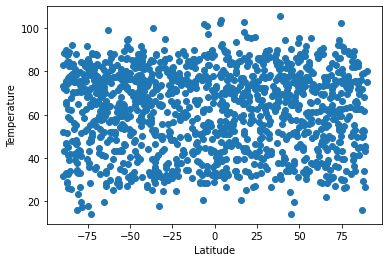

In [102]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Humidity Plot

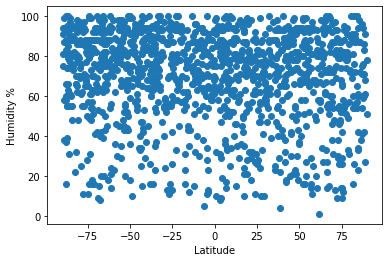

In [103]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Cloudiness Plot

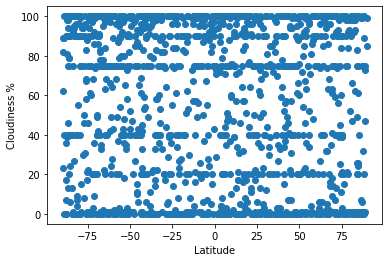

In [106]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Wind Speed Plot

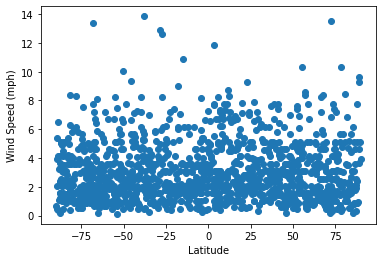

In [105]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


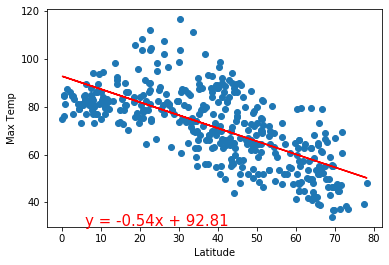

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


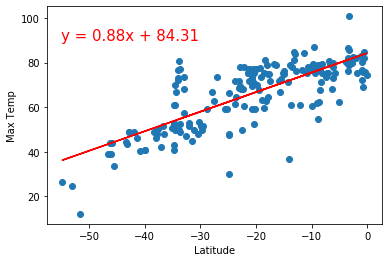

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


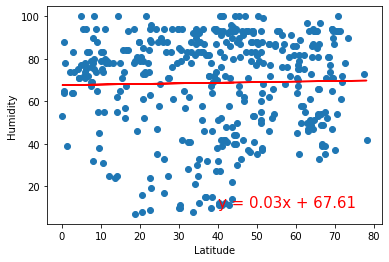

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


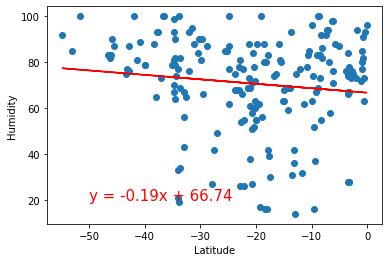

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


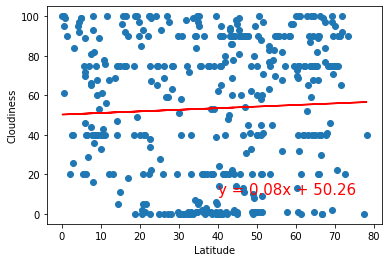

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


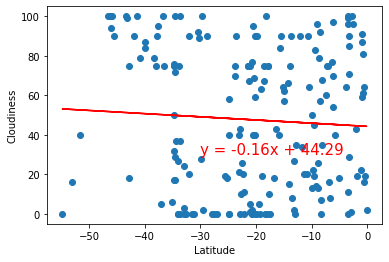

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


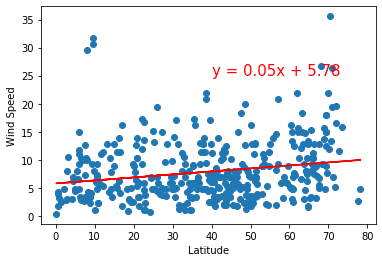

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


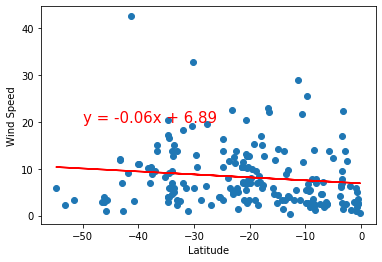